# 📈 Simulating Stock Prices using Geometric Brownian Motion

This project implements a simulation of Stock Prices using Geometric Brownian Motion, a fundamental stochastic process in Quantitative Finance.

### ✅ Objectives:
- Understand and derive GBM from first principles.
- Implement a step-by-step Python simulation of GBM.
- Visualise both single and multiple stock prices path (Monte Carlo simulation).
- Build strong intuition for quant theory and practical modeling.

## 🧠 Background: Stochastic Processes and Brownian Motion

A **stochastic process** models how a variable evolves over time with randomness.  
The **Wiener process** or **Brownian Motion** is the foundation for modeling random shocks in continuous-time finance.

**Key Properties:**

- Starts at zero: $( W(0) = 0 )$  
- Independent, normally distributed increments:  
  $( W(t + \Delta t) - W(t) \sim \mathcal{N}(0, \Delta t) )$  
- The standard Brownian motion has expected value $( \mathbb{E}[W(t)] = 0 )$  
  and variance $( \text{Var}(W(t)) = t )$

## 📐 Deriving Geometric Brownian Motion

We model stock prices using the following SDE:

$[
dS(t) = \mu S(t) dt + \sigma S(t) dW(t)
]$

Solution to this equation gives:

$[
S(t) = S_0 \cdot \exp\left( \left( \mu - \frac{\sigma^2}{2} \right)t + \sigma W(t) \right)
]$

Where:
- $( \mu )$ : expected return (drift)
- $( \sigma )$ : volatility
- $( W(t) )$ : Brownian motion

### 📦 Import necessary Python libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 🎯 Set initial simulation parameters

In [3]:
# Define initial stock price S0
S0 = 100

# Define drift mu (expected annual return)
mu = 0.08

# Define volatility sigma (annual)
sigma = 0.2

# Define time horizon T (in years)
T = 1.0

# Define number of time steps N (e.g., 252 for daily over a year)
N = 252

# Define number of simulations M (e.g., 1000)
M = 1000

### 🕒 Create a time grid for the simulation

In [4]:
# Time-step size
dt = T/N

# Time grid: N+1 points including t=0
time_grid = np.arange(0, T+dt, dt)

### 🌪️ Generate Brownian Motion (Wiener process)

In [5]:
# For a single simulation path:

# Generate N standard normal random variables
# Scale them by sqrt(dt)
# Take cumulative sum to simulate W(t)

# N standard normal random numbers
Z_single = np.random.normal(0, 1, N)

# Brownian motion path
W_single = np.cumsum(Z_single) * np.sqrt(dt)

# Add W(0) = 0 at the start
W_single = np.insert(W_single, 0, 0)
# print(f'W_single: {W_single}')

# For M simulated paths (Monte Carlo simulation)

# M x N standard normal samples
Z = np.random.normal(0, 1, (M, N))

# Brownian motion paths
W = np.cumsum(Z, axis=1) * np.sqrt(dt)

# Add W(0) = 0 to each path
W = np.hstack((np.zeros((M, 1)), W))
# print(f'W: {W}')

### 📊 Use GBM formula to simulate stock price paths

In [6]:
# Compute GBM path using the analytical solution

# print("time_grid shape:", time_grid.shape)
# print("W_single shape:", W_single.shape)

S_single = S0 * np.exp((mu - 0.5 * sigma**2) * time_grid + sigma * W_single)
# print(f'S_single: {S_single}')

### Monte Carlo Simulation

In [7]:
# Use W (M x N+1) and time_grid
# Use broadcasting to apply the formula to all M paths

# Reshape time_grid to (1, N+1) for broadcasting
t = time_grid.reshape(1, -1)

S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)

### 📉 Step 6: Plot a Single GBM Path

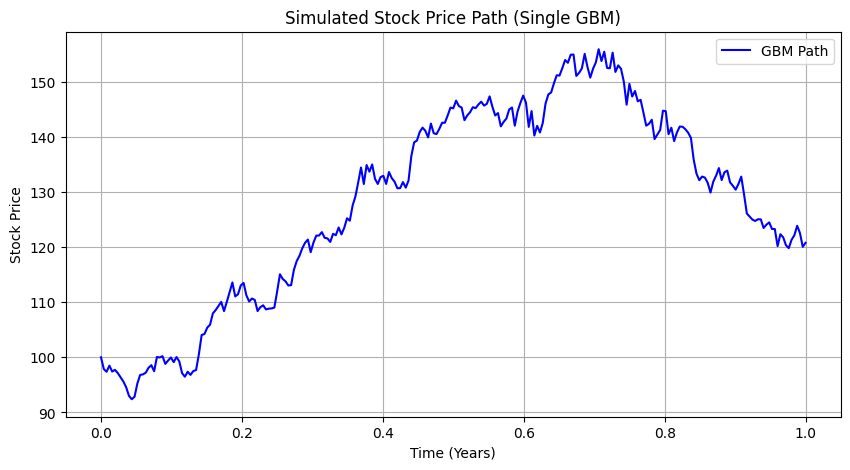

In [8]:
# Plot single GBM path
plt.figure(figsize=(10, 5))
plt.plot(time_grid, S_single, label='GBM Path', color='blue')

# Plot annotations
plt.title("Simulated Stock Price Path (Single GBM)")
plt.xlabel("Time (Years)")
plt.ylabel("Stock Price")
plt.grid(True)
plt.legend()
plt.show()

### 📊 Plot Multiple GBM Paths (Monte Carlo)

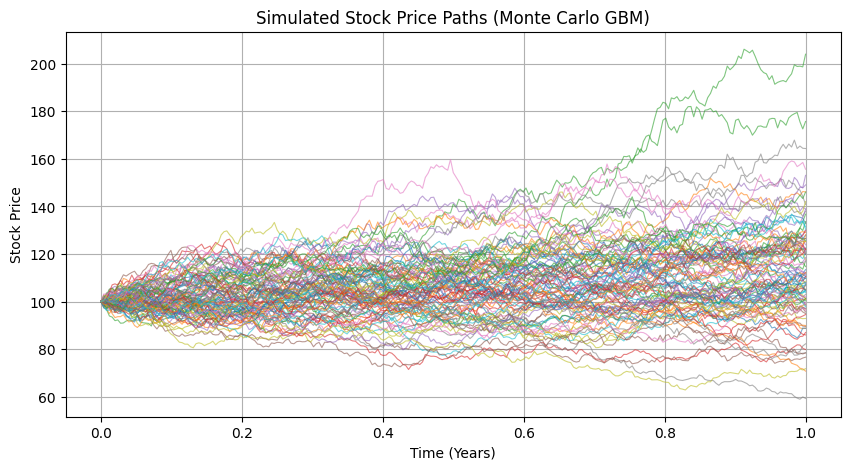

In [9]:
# Plot multiple GBM paths (Monte Carlo simulation)
plt.figure(figsize=(10, 5))

# Plot a subset if M is large (e.g., 100 out of 1000)
for i in range(min(100, S.shape[0])):
    plt.plot(time_grid, S[i], lw=0.8, alpha=0.6)

# Plot annotations
plt.title("Simulated Stock Price Paths (Monte Carlo GBM)")
plt.xlabel("Time (Years)")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()

### 📊 Statistical Summaries (Mean, Percentiles)

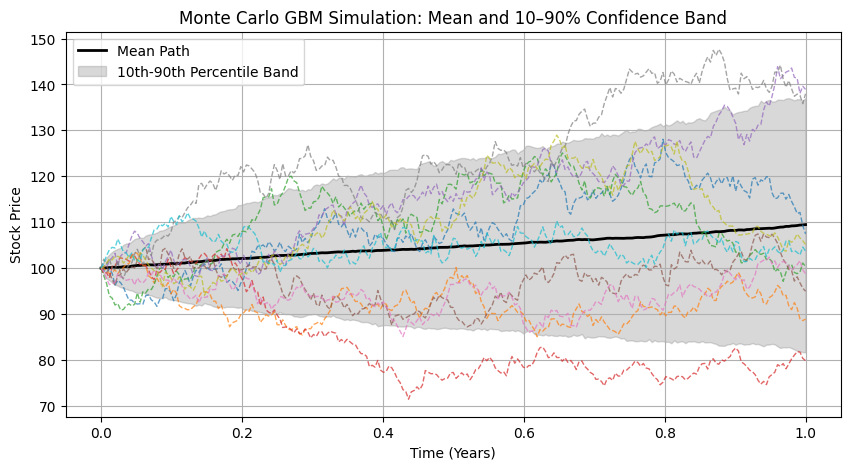

In [10]:
# Calculate mean and percentiles across simulations
mean_path = np.mean(S, axis=0)
p10 = np.percentile(S, 10, axis=0)
p90 = np.percentile(S, 90, axis=0)

# Plot mean and percentile bands
plt.figure(figsize=(10, 5))

plt.plot(time_grid, mean_path, label='Mean Path', color='black', linewidth=2)
plt.fill_between(time_grid, p10, p90, color='gray', alpha=0.3, label='10th-90th Percentile Band')

# Optionally: overlay a few sample paths
for i in range(10):
    plt.plot(time_grid, S[i], lw=1, alpha=0.7, linestyle='--')

# Annotations
plt.title("Monte Carlo GBM Simulation: Mean and 10–90% Confidence Band")
plt.xlabel("Time (Years)")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()


### 🎥 Animate the Simulation

In [11]:
print("S shape:", S.shape)            # Should be (M, N+1)
print("time_grid shape:", time_grid.shape)  # Should be (N+1,)

S shape: (1000, 253)
time_grid shape: (253,)


In [12]:
!pip install pillow

Frame: 1
time_grid[:frame]: [0.]
S[0, :frame]: [100.]
Lengths: 1 1


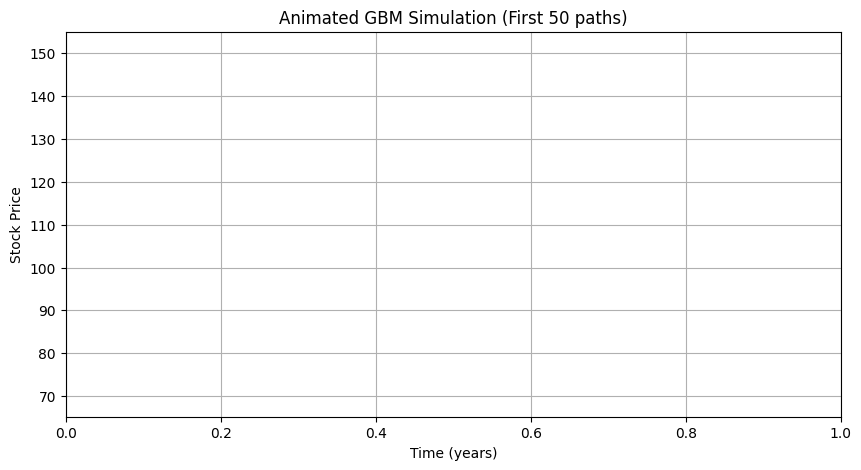

In [15]:
from matplotlib.animation import FuncAnimation

# Create figure and axis
num_path_to_plot = min(50, S.shape[0])
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlim(0,T)
ax.set_ylim(np.min(S[:,:100]),np.max(S[:,:100]))
ax.set_title("Animated GBM Simulation (First 50 paths)")
ax.set_xlabel("Time (years)")
ax.set_ylabel("Stock Price")
ax.grid(True)

# Plot lines for multiple paths
lines = [ax.plot([],[], lw=1)[0] for _ in range(num_path_to_plot)]

# Initialisation Function
def init():
    for line in lines:
        line.set_data([],[])
    return lines

# Update function for each frame
def update(frame):
    if frame == 1:
        print("Frame:", frame)
        print("time_grid[:frame]:", time_grid[:frame])
        print("S[0, :frame]:", S[0, :frame])
        print("Lengths:", len(time_grid[:frame]), len(S[0, :frame]))
         
    for i, line in enumerate(lines):
        line.set_data(time_grid[:frame], S[i, :frame])
    return lines

# Animate
anim = FuncAnimation(fig, update, frames=np.arange(1, len(time_grid)), init_func = init,
                   blit = False, interval = 40, repeat = False)
anim.save("gbm_simulation.gif", writer="pillow", fps=30)
# plt.show()

### 🧾 Histogram of Final Prices

In [17]:
print("Simulations shape:", S.shape)

Simulations shape: (1000, 253)


<function matplotlib.pyplot.show(close=None, block=None)>

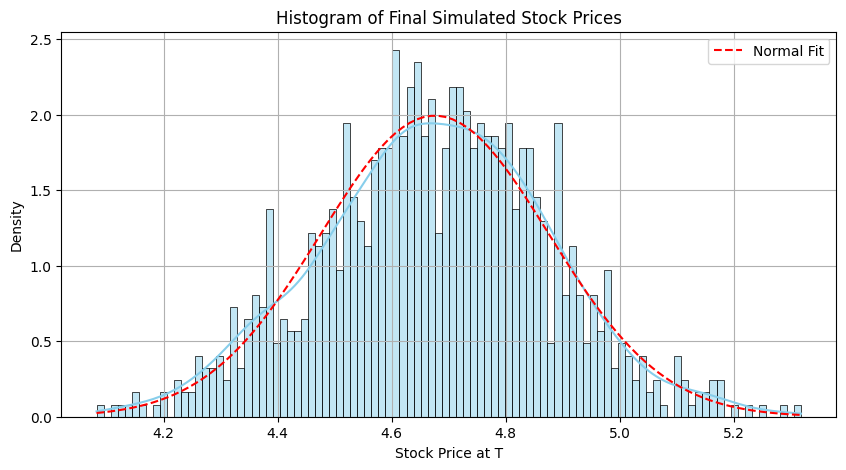

In [18]:
from scipy.stats import norm

# Extract final prices
final_prices = S[:,-1]
log_final_prices = np.log(final_prices)

# Plot Histogram
plt.figure(figsize = (10,5))
sns.histplot(log_final_prices, bins = 100, kde=True, stat='density', color='skyblue')

# Overlay Normal Distribution
mean_final = np.mean(log_final_prices)
std_final = np.std(log_final_prices)
x_vals = np.linspace(np.min(log_final_prices), np.max(log_final_prices), 100)
plt.plot(x_vals, norm.pdf(x_vals, mean_final, std_final), 'r--', label='Normal Fit')

# Annotations
plt.title('Histogram of Final Simulated Stock Prices')
plt.xlabel("Stock Price at T")
plt.ylabel("Density")
# plt.xlim(np.percentile(log_final_prices, 1), np.percentile(log_final_prices, 99))
plt.legend()
plt.grid(True)
plt.show